In [157]:
import numpy as np
from os.path  import join

#Function to load dataset images and label
def load_image_and_labels(images_path, labels_path):        
        images = []
        with open(images_path, 'rb') as f:
            magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
            images = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
            images = images.reshape((size, rows, cols))
        
        labels = []
        with open('./Dataset/train-labels.idx1-ubyte', 'rb') as f:
            magic, size = struct.unpack(">II", f.read(8))
            labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        
        return images, labels

In [159]:
#Load dataset
X_train, y_train = load_image_and_labels('./Dataset/train-images.idx3-ubyte', './Dataset/train-labels.idx1-ubyte')
X_test, y_test = load_image_and_labels('./Dataset/t10k-images.idx3-ubyte', './Dataset/t10k-labels.idx1-ubyte')

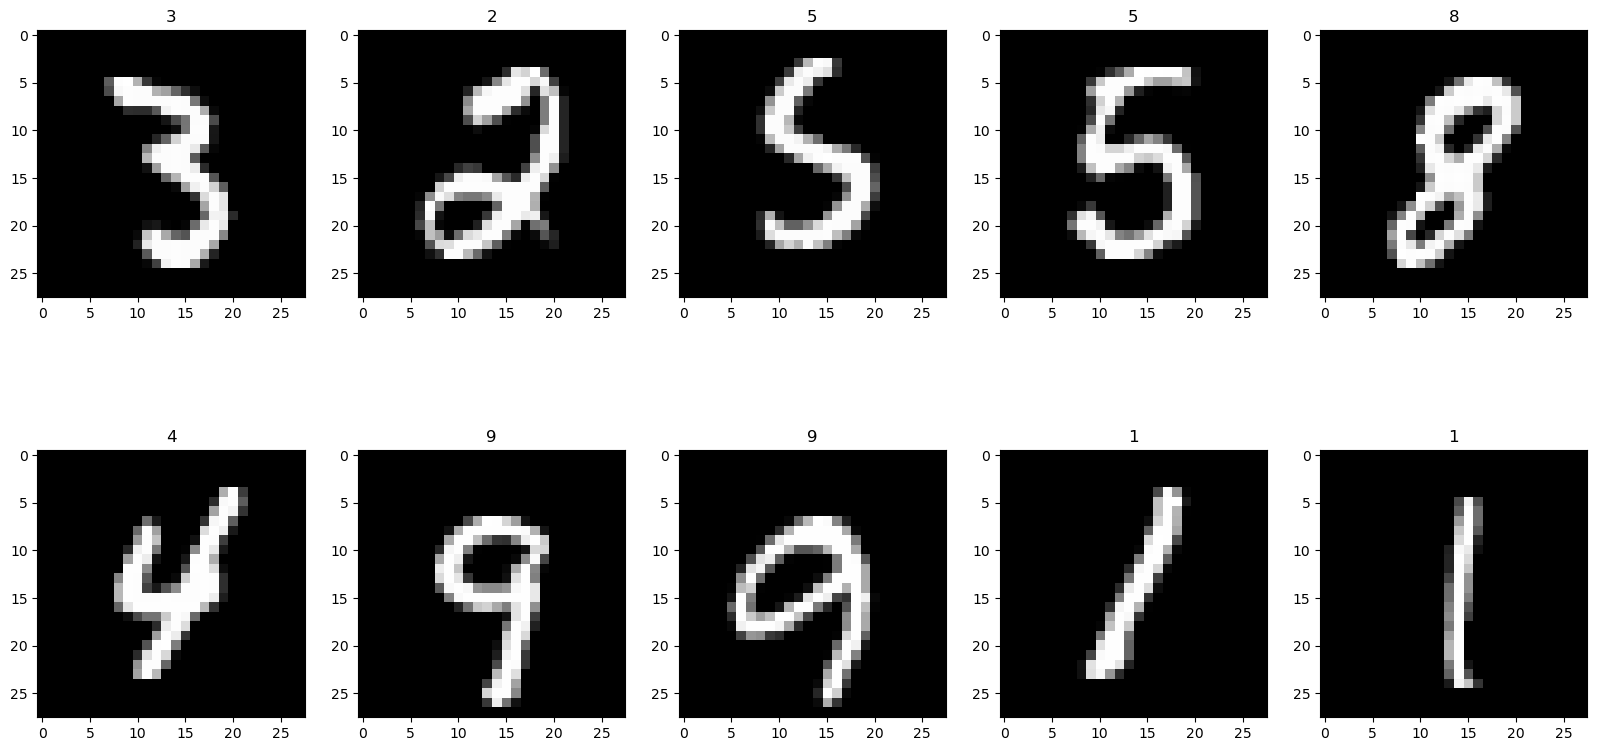

In [172]:
#Initial view of the training data
%matplotlib inline
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()

for i in range(10):
    ind = random.randint(1, 60000)
    axs[i].imshow(X_train[ind, :, :], cmap = "gray")
    axs[i].set_title(str(y_train[ind]))

In [161]:
#Get the indexes for each class
class_index_dict = {}
for label in np.unique(y_train):
    class_index_dict[label] =  np.where(y_train == label)        

# Data Exploratory analysis

In [162]:
#finding out all the labels in the data
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

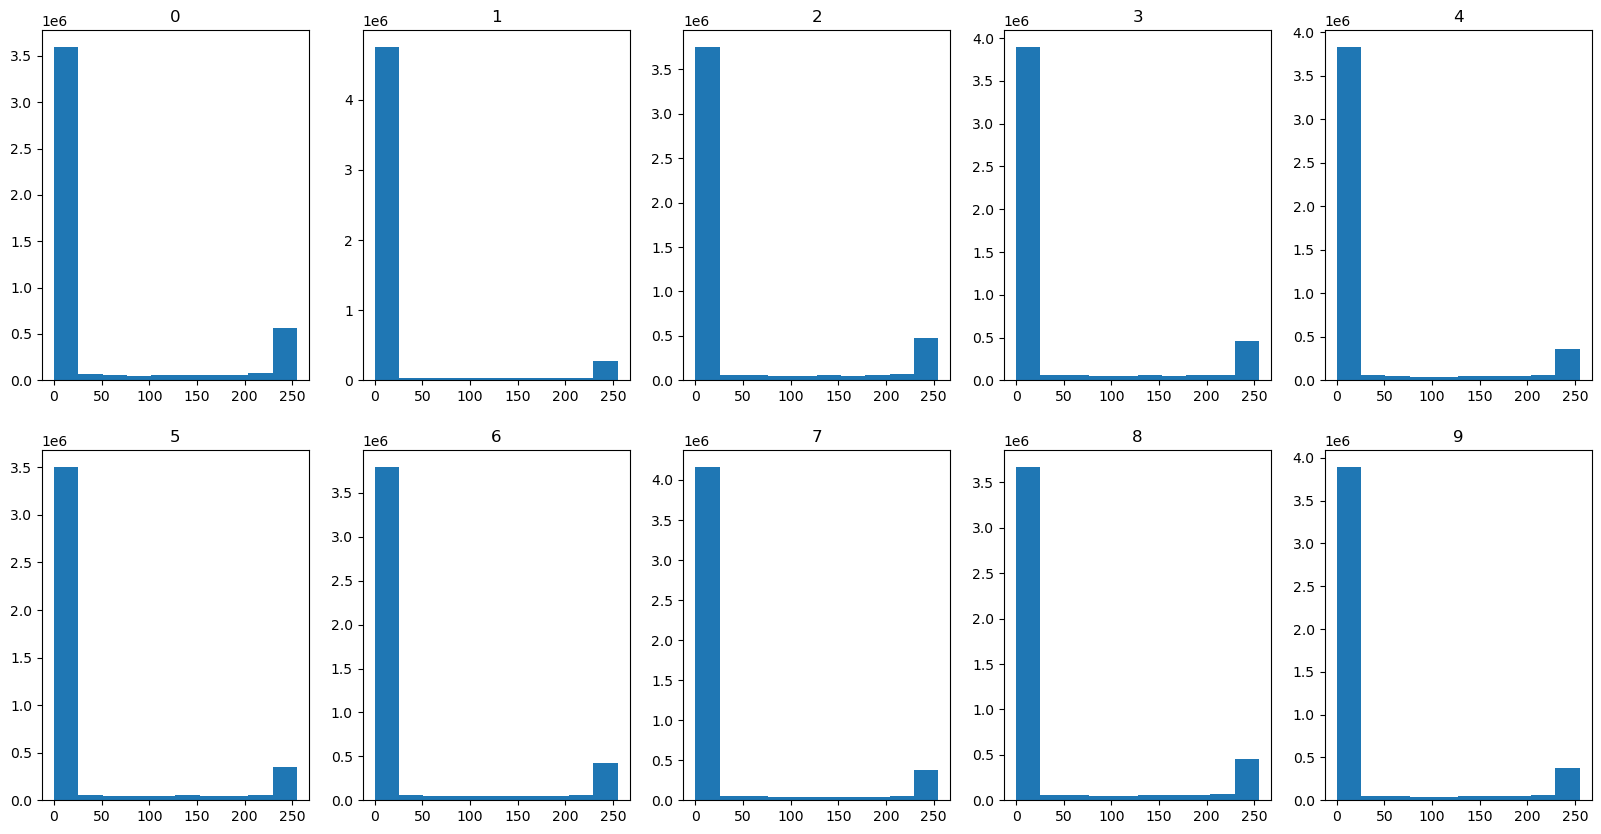

In [176]:
#plotting the number of pixel for each intensity
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()
for i in range(10):
    axs[i].hist(X_train[class_index_dict[i]].reshape(-1))
    axs[i].set_title(i)

<BarContainer object of 10 artists>

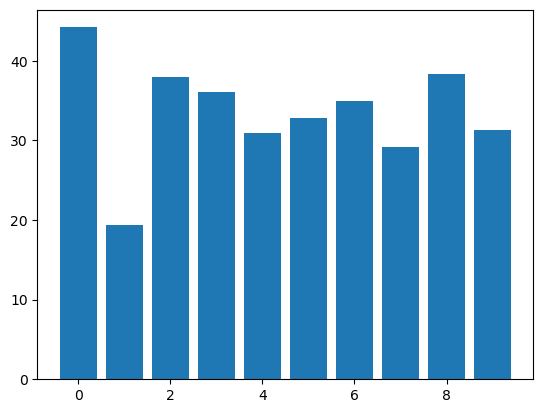

In [177]:
#plot the average pixel value for each label
avg_val = []
labels = []
for i in range(10):
    avg_val.append(np.average(X_train[class_index_dict[i]].reshape(-1)))
    labels.append(i)
plt.bar(labels, avg_val)

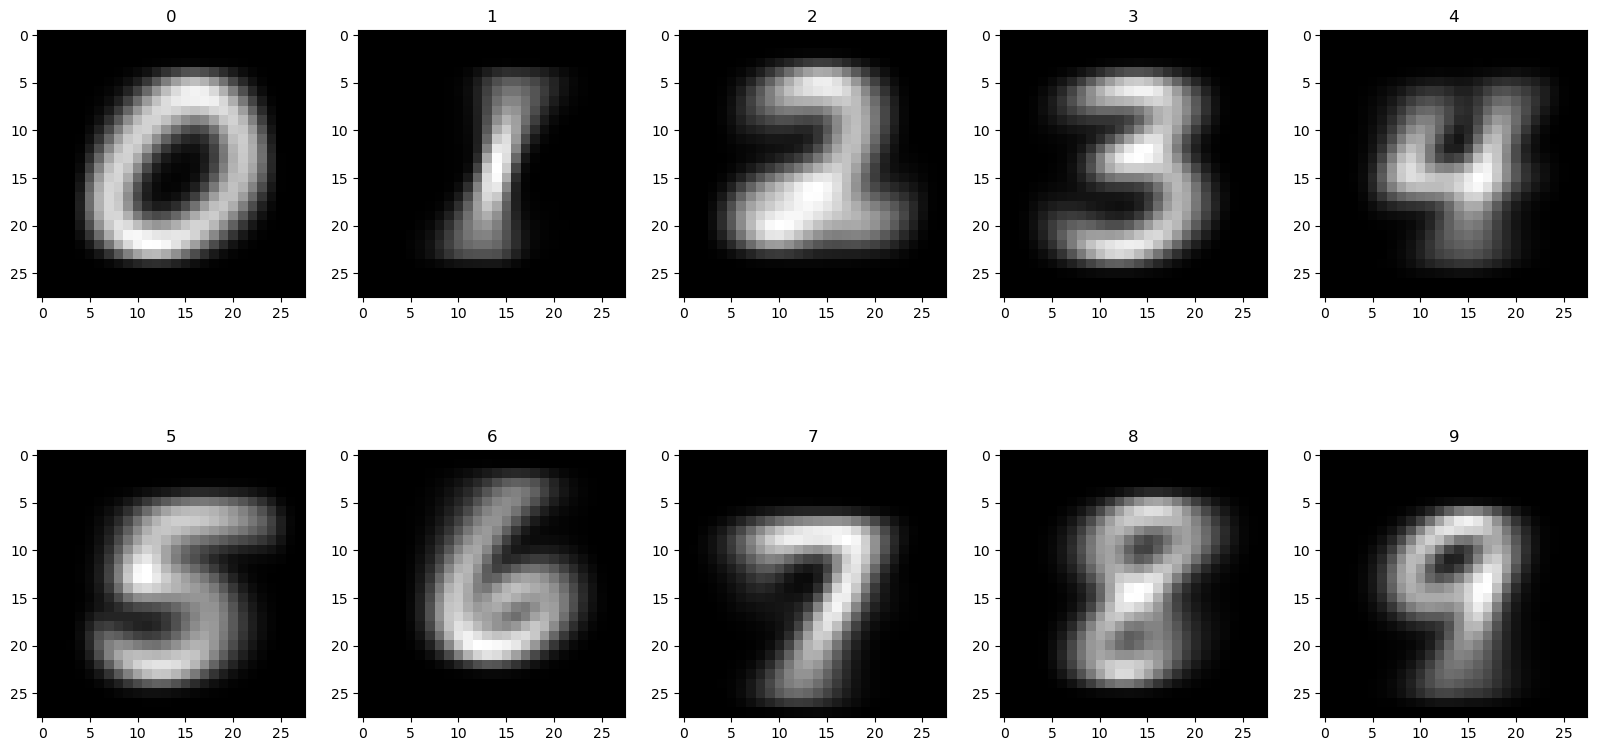

In [167]:
#plot the average image of every label.
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i=0
axs = axs.flatten()

for key in class_index_dict.keys():
    axs[i].imshow(np.average(X_train[class_index_dict[key]], axis = 0),cmap='gray')
    axs[i].set_title(i)
    i+=1

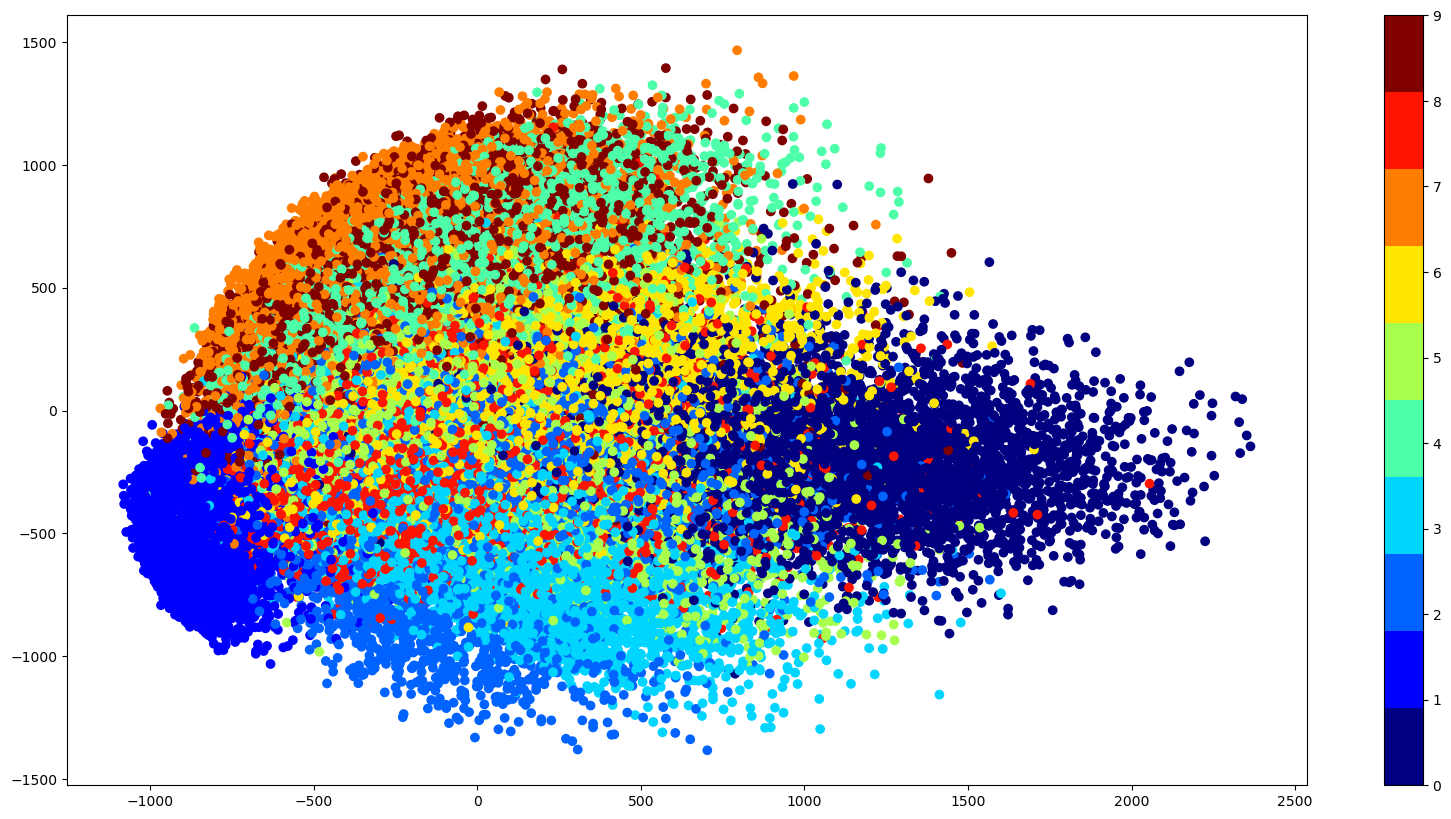

In [168]:
#plotting PCA of the data
from sklearn.decomposition import PCA

flattened_xtrain = X_train.reshape(60000, 28*28)
pca = PCA().fit_transform(flattened_xtrain)
figure = plt.figure(figsize=(20,10))
plt.scatter(pca[:,0], pca[:,1], c= y_train, cmap = plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))

C:\Users\Jelly\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jelly\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


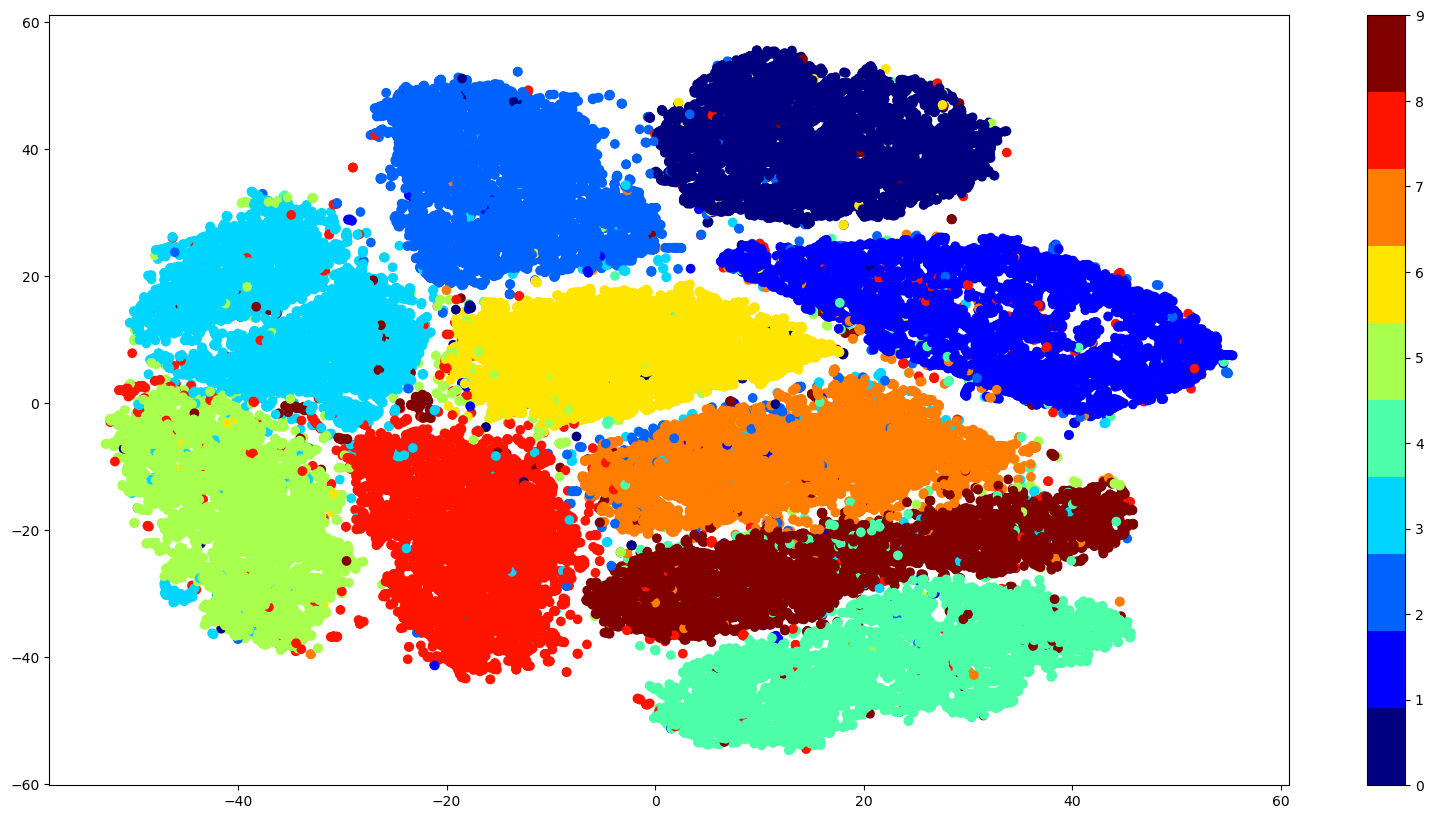

In [139]:
#plotting TSNE of the data
from sklearn.manifold import TSNE
embeddings = TSNE(n_jobs=4).fit_transform(flattened_xtrain)
figure = plt.figure(figsize=(20,10))

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))